<a href="https://colab.research.google.com/github/bruno774/mestrado/blob/master/AlemDaPena_p1_preProcessamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# extract and initial analysis

In [1]:
import pandas as pd
import numpy as np


In [5]:
!pip freeze > requirements.txt

## dataset loading

In [2]:
data_src = pd.read_csv('AlemDaPena Ajustado - Consolidadov3.csv', 
                       header=2, 
                       dtype={'ReclusaoDias':np.int64,'MultaDias':np.int64,'PenaMinLegal':np.int64})


## preliminary steps

Avaliação dos dados, com busca por principais padrões, tipos de dados, características do dataset, eventuais inconsistências, padrões observados por amostragem, dentre outros.

Perceber alterações que serão necessárias aplicar ao dataset antes de submeter aos algoritmos de aprendizagem de máquina.

Segue análise estatística que colabora na identificação.

In [3]:
data_src.head().T

,0,1,2,3,4
NumProc,135220098200001,00177515820068200001,00204704220088200001,00207922820098200001,00234719820098200001
Ano,2010,2010,2010,2010,2010
GeneroReu,M,M,M,M,M
Reclusao,0,1,0,0,0
ReclusaoDias,0,960,0,0,0
Detencao,1,0,1,1,1
DetencaoDias,960,0,0,0,0
Multa,0,1,1,0,1
MultaDias,0,13,10,0,24
RegimeInicial,Aberto,Aberto,Aberto,Aberto,Aberto


In [ ]:
data_src.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NumProc            882 non-null    object
 1   Ano                882 non-null    int64 
 2   GeneroReu          882 non-null    object
 3   Reclusao           882 non-null    int64 
 4   ReclusaoDias       882 non-null    int64 
 5   Detencao           882 non-null    int64 
 6   DetencaoDias       882 non-null    int64 
 7   Multa              882 non-null    int64 
 8   MultaDias          882 non-null    int64 
 9   RegimeInicial      882 non-null    object
 10  CulpabCirc         882 non-null    int64 
 11  AntecedCirc        882 non-null    int64 
 12  CondSocialCirc     882 non-null    int64 
 13  PersonCirc         882 non-null    int64 
 14  MotivosCirc        882 non-null    int64 
 15  CircCrimeCirc      882 non-null    int64 
 16  ConseqCrimeCirc    882 non-null    int64 
 1

Avaliacao preliminar:

- 882 samples
- 22 attributes
- 4 string attributes (NumProc, RegimeInicial, TipoPenal, TipoPenalGenerico)
- TipoPenal e TipoPenalGenerico have 882-606 null values, rach
- column NumProc has a index number for lawsuits --> discard **NumProc**
- column Ano has a time marker for cases --> keep
- columns GeneroReu and COndSocialCirc are potencial classes
- columns Ano, ReclusaoDias, DetencaoDias and MultaDias have continuous/numerical values --> normlise
- columns TipoPenal and TipoPenalGenerico have corretated intentional info --> discard **TipoPenal**
- other columns have binary values

## cleaning

Providências iniciais identificadas:

- descartar campos/atributos irrelevantes para classificação ou agrupamento: NumProc, 
- descartar TipoPenal por escolha de codificação em TipoPenalGenerico
- transformar GeneroReu, RegimeInicial, TipoPenalGenerico em valores numéricos

In [4]:
data_src.drop(columns=['NumProc','TipoPenal'], inplace=True)

In [5]:
# remove rows with some null column
data_src.dropna(inplace=True)

In [ ]:
# remove duplicate rows -- not used because all samples were from different lawsuits
#data_src.drop_duplicates(inplace=True)

In [6]:
data_src.shape

(606, 20)

## data exploration


In [7]:
# transformation to clear readability
data_src.replace({'Reclusao':{0:'N',1:'S'}},inplace=True)
data_src.replace({'Detencao':{0:'N',1:'S'}},inplace=True)
data_src.replace({'Multa':{0:'N',1:'S'}},inplace=True)
data_src.replace({'CulpabCirc':{0:'N',1:'S'}},inplace=True)
data_src.replace({'AntecedCirc':{0:'N',1:'S'}},inplace=True)
data_src.replace({'CondSocialCirc':{0:'N',1:'S'}},inplace=True)
data_src.replace({'PersonCirc':{0:'N',1:'S'}},inplace=True)
data_src.replace({'MotivosCirc':{0:'N',1:'S'}},inplace=True)
data_src.replace({'CircCrimeCirc':{0:'N',1:'S'}},inplace=True)
data_src.replace({'ConseqCrimeCirc':{0:'N',1:'S'}},inplace=True)
data_src.replace({'ComportVitimaCirc':{0:'N',1:'S'}},inplace=True)
data_src.replace({'CircReincidencia':{0:'N',1:'S'}},inplace=True)
data_src.replace({'PenaMinLegal':{0:'N',1:'S'}},inplace=True)

In [9]:
for col in data_src:
    print(col, ':', data_src[col].unique())

Ano : [2010 2011 2012 2013 2014 2015 2016 2019 2018 2008 2020 2017 2009 2007]
GeneroReu : ['M' 'F']
Reclusao : ['N' 'S']
ReclusaoDias : [   0  720  540  480  780 1440 1050 1260 1920 1800 3286  900 2340 1980
  450  840  990 2240 1560 2520 1080 3960 2700  360  420 2460  150 1710
 2400 3000 2160 1350 2970 2880  225  180 1520 3120  240 2040  120 1620
 4800 2592 2268 3840  570 2070 2640 2765 1530  630 2800 2706  746 3400
  960  880 1200  270  750 2560 1500 2100 1680 1890 1950 1575 1650 1625
 2730 2639 2682  300 1822 2430 5760 3920 1125 4680  600  810 2310 1120
 3528 3600 3060 1400 5204 9750 1792 1190  660  560 2025 1461 1138 4410
 5400 3986 2688  760  640  673 1930 6030 4320 7920 5040 2598 1170 3151
 1830  432 6143  685 4080   90 1380 6960 2300 5265 2280 1290 1280 1181
 6120 2550 1740  855 5940 1140  800 7560 1020 1728 3150 6480 2760]
Detencao : ['S' 'N']
DetencaoDias : [   0   90  120  325  300   60  240   30   75  720   15  360  100  180
  123  960  140  540 1560  150 1140  480 1500  270 

### classes

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


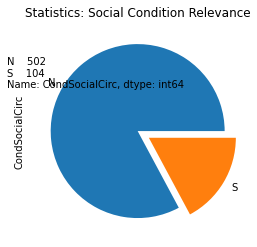

In [11]:
data_src['CondSocialCirc'].value_counts().plot.pie(explode=(0.0, 0.15))
plt.text(-1.5,0.5,str(data_src['CondSocialCirc'].value_counts(normalize=False,)))
plt.title('Statistics: Social Condition Relevance')
plt.show()

In [ ]:
data_src['CondSocialCirc'].value_counts(normalize='True')

N    0.828383
S    0.171617
Name: CondSocialCirc, dtype: float64

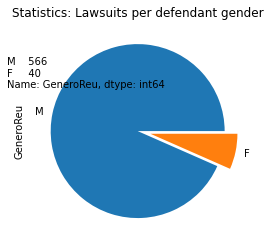

In [ ]:
data_src['GeneroReu'].value_counts().plot.pie(explode=(0.0, 0.15))
plt.text(-1.5,0.5,str(data_src['GeneroReu'].value_counts(normalize=False,)))
plt.title('Statistics: Lawsuits per defendant gender')
plt.show()

In [ ]:
data_src['GeneroReu'].value_counts(normalize=True)

M    0.933993
F    0.066007
Name: GeneroReu, dtype: float64

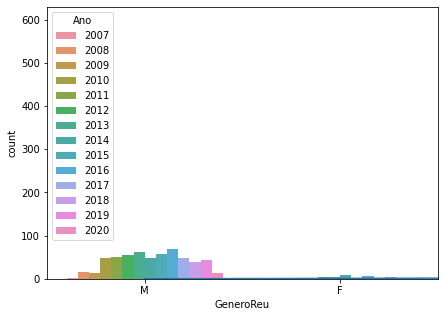

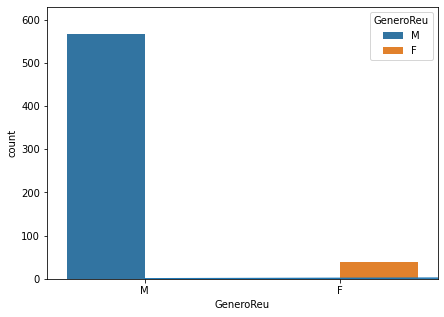

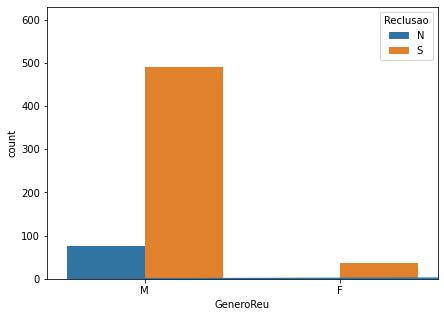

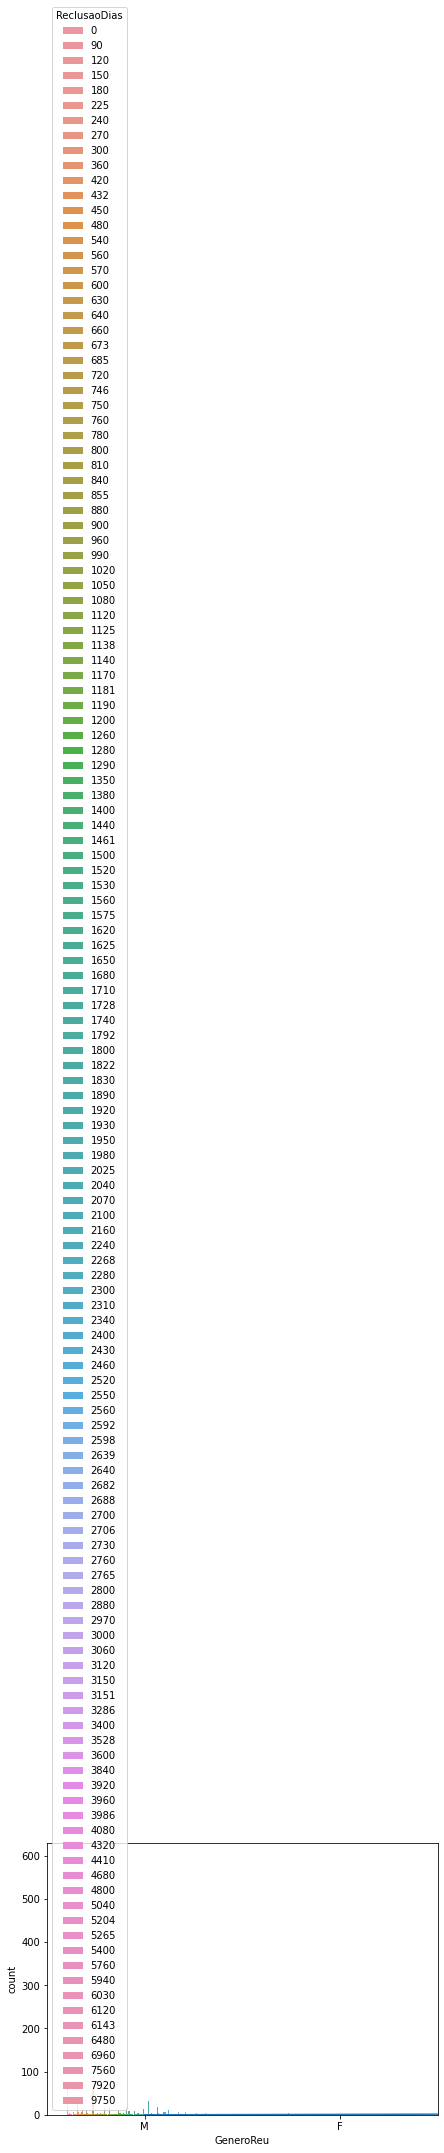

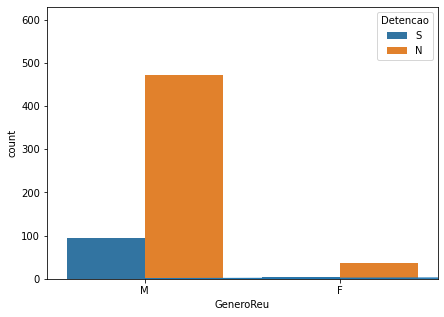

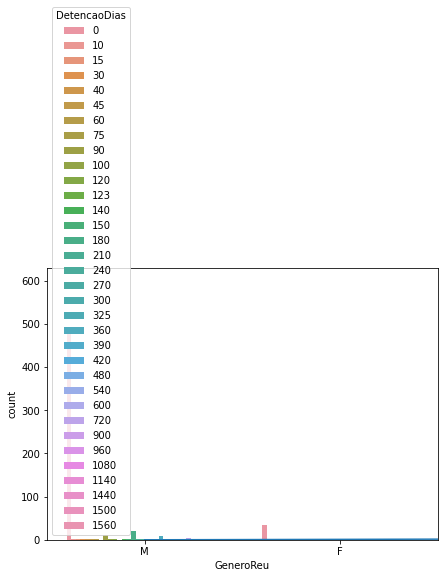

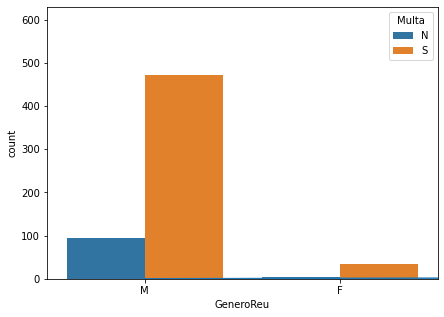

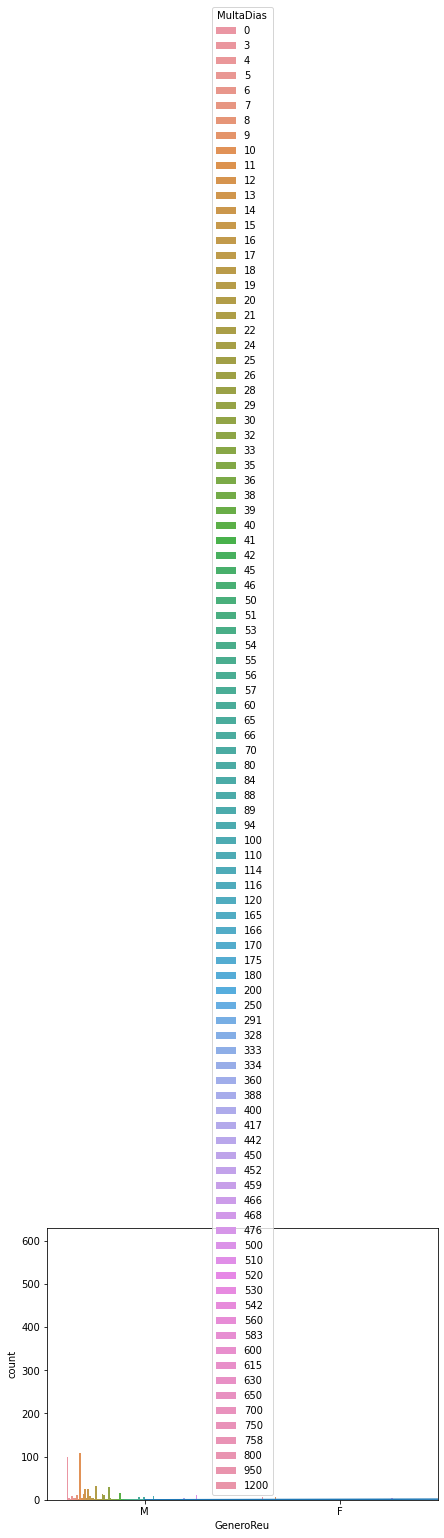

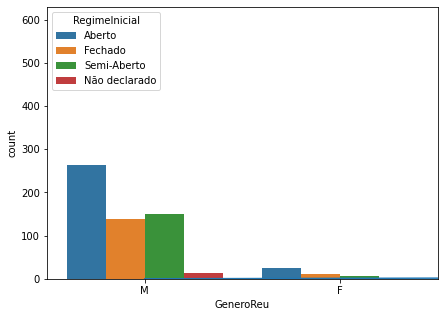

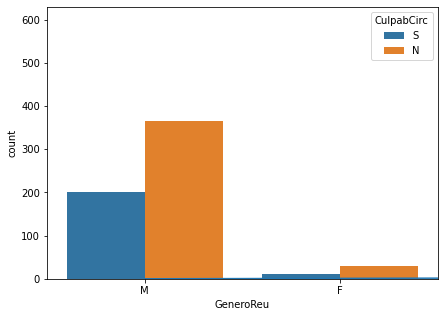

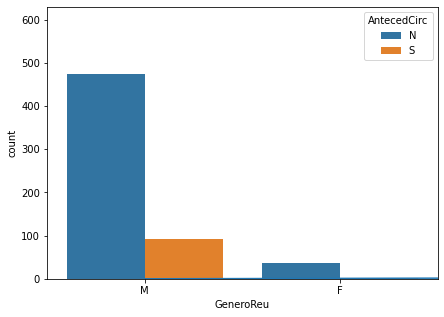

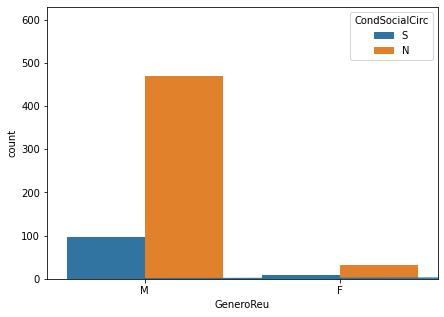

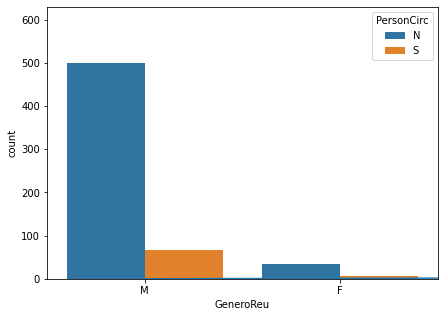

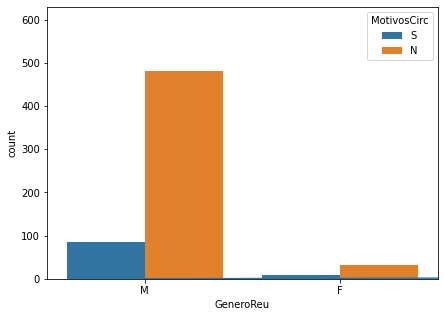

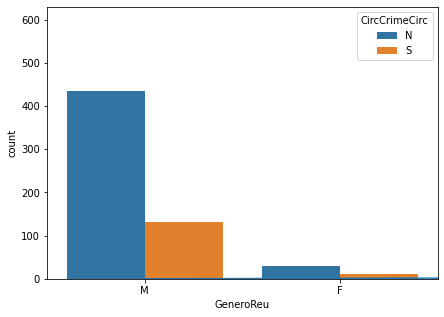

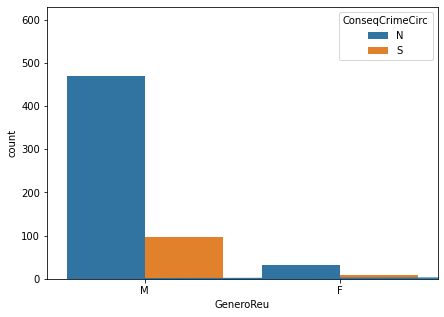

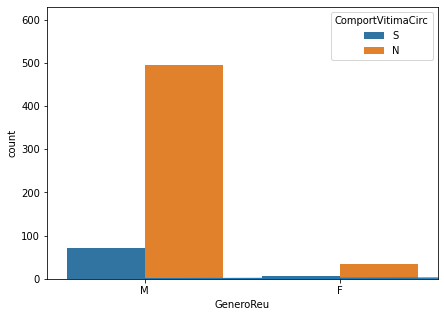

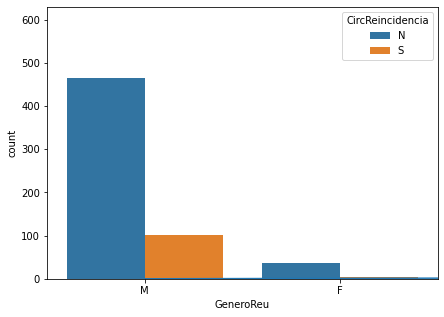

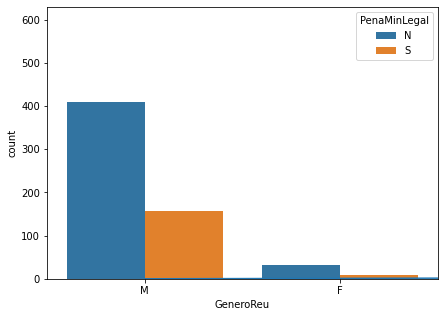

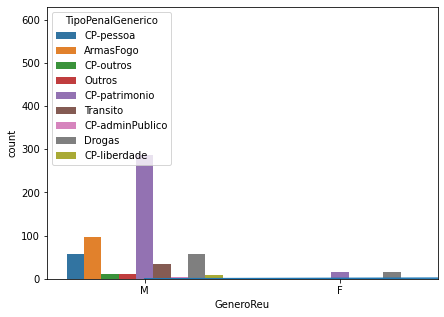

In [12]:
cols = data_src.columns

for col in cols:
    fig,ax = plt.subplots(figsize=(7,5))
    plt.plot(range(600))
    plt.ylabel(col)
    sns.countplot(x='GeneroReu', hue=col, data=data_src)

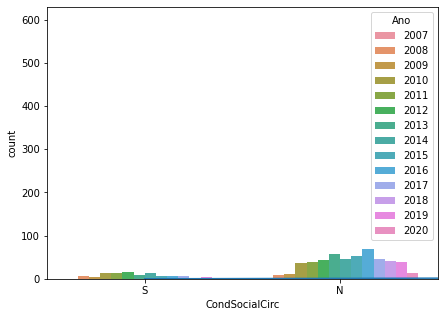

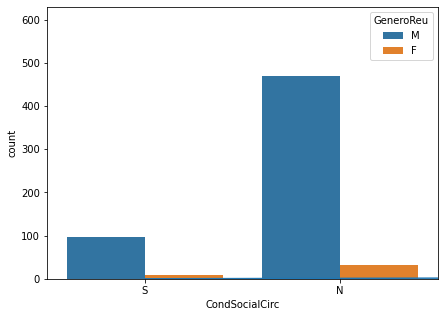

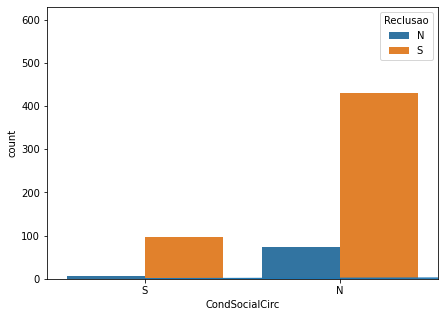

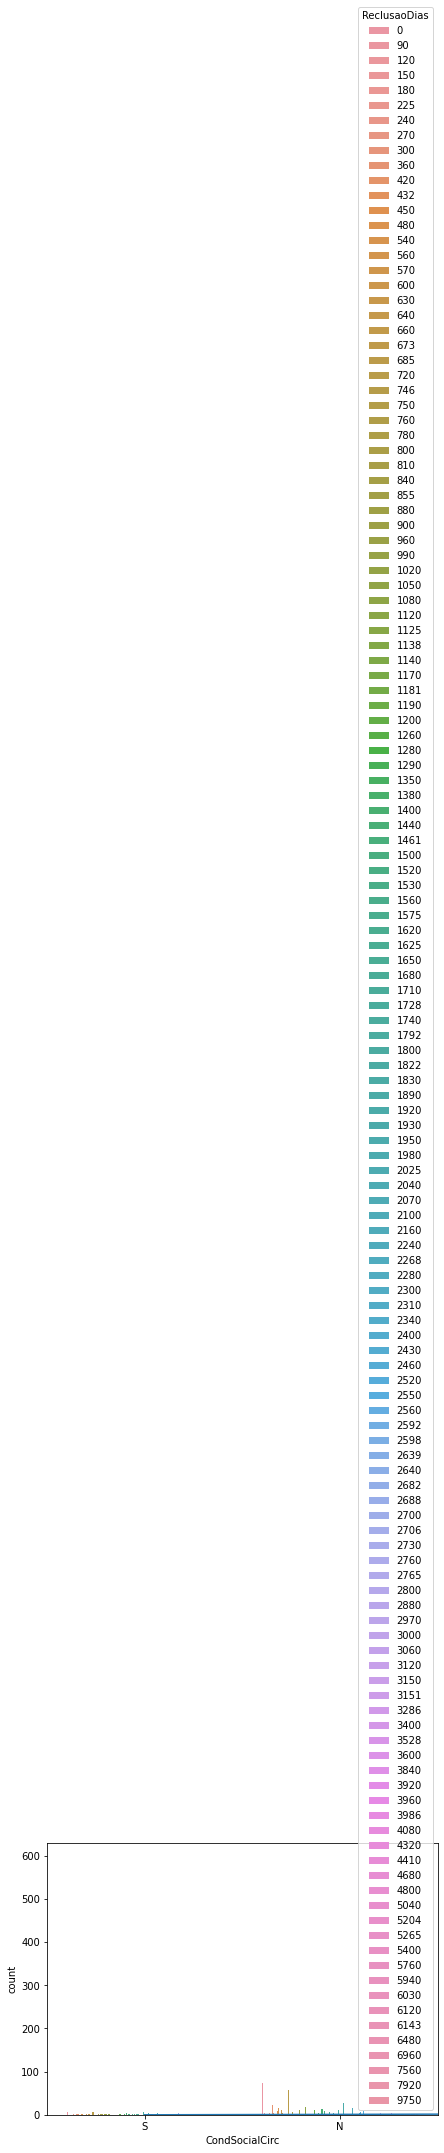

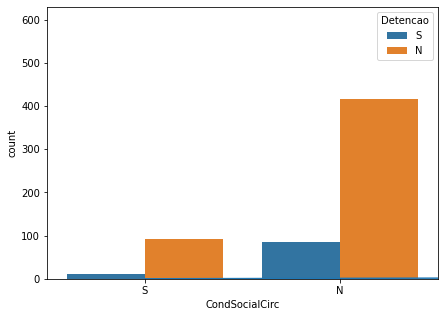

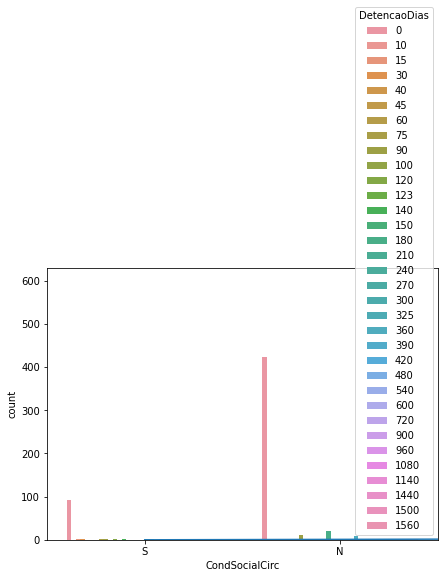

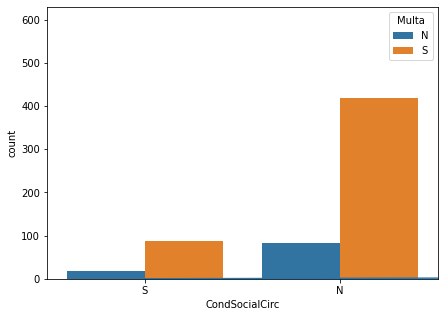

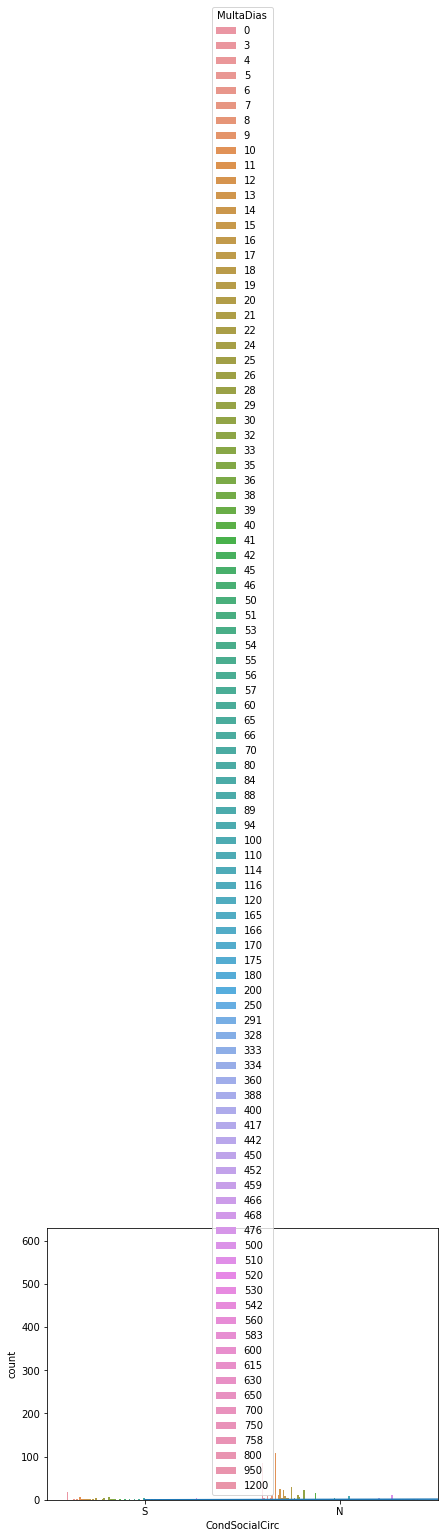

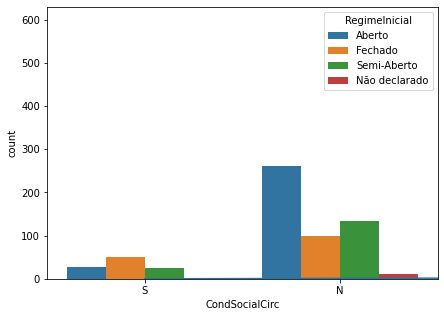

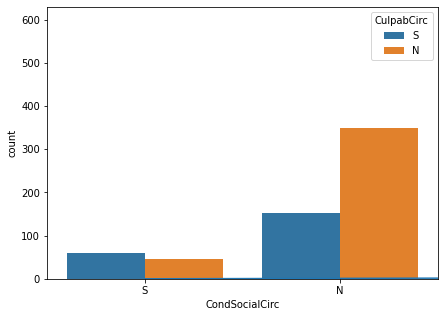

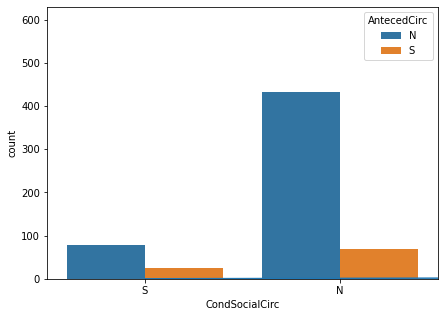

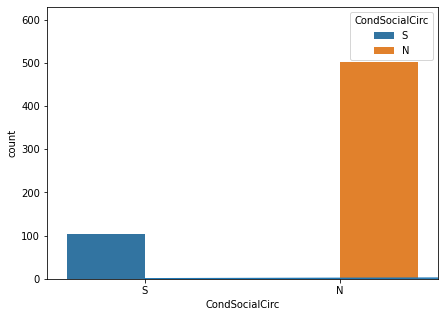

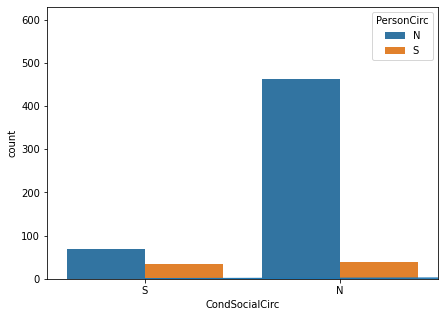

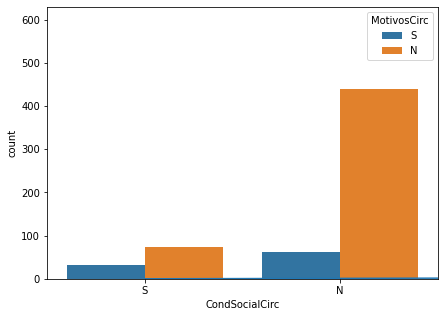

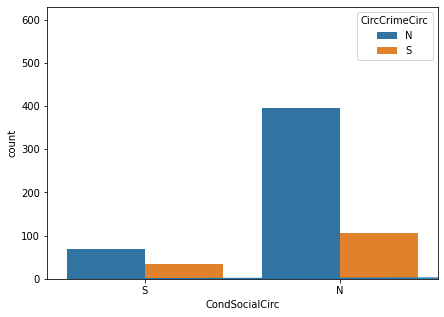

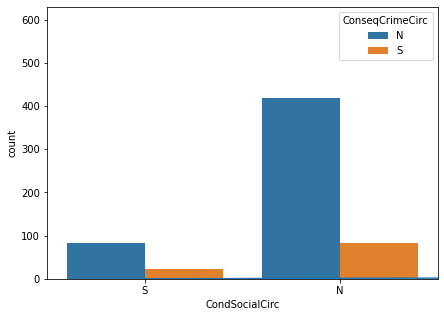

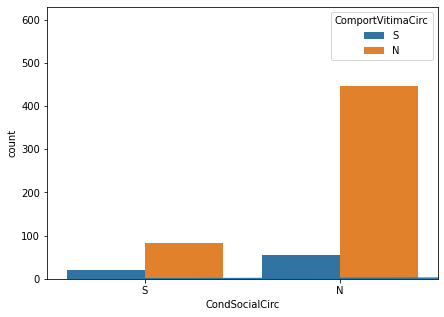

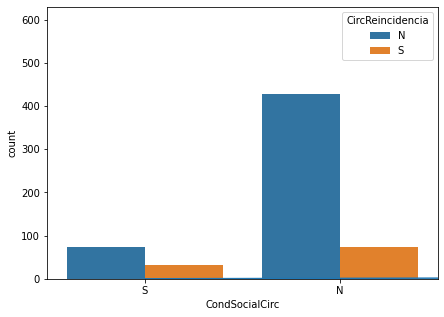

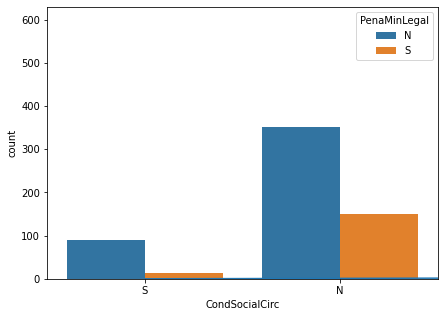

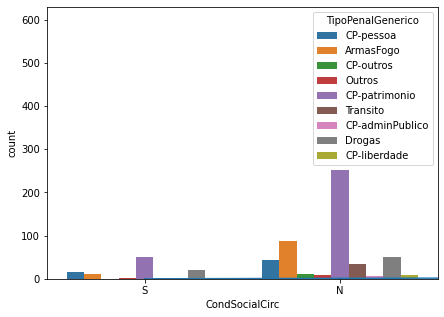

In [13]:

for col in cols:
    fig,ax = plt.subplots(figsize=(7,5))
    plt.plot(range(600))
    plt.ylabel(col)
    sns.countplot(x='CondSocialCirc', hue=col, data=data_src)

### other attributes

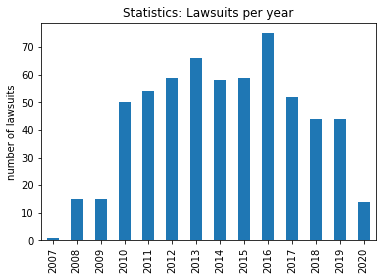

In [ ]:
data_src['Ano'].value_counts(sort=False).plot.bar()
plt.title('Statistics: Lawsuits per year')
plt.ylabel('number of lawsuits')
plt.show()

In [ ]:
data_src[(data_src['Ano']>=2010)].value_counts(subset=['Ano']).mean()

52.27272727272727

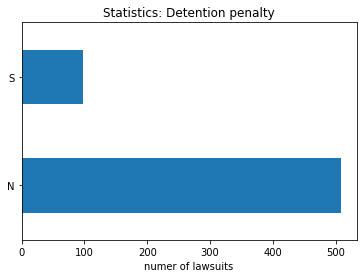

In [ ]:
data_src['Detencao'].value_counts().plot.barh()
plt.title('Statistics: Detention penalty')
plt.xlabel('numer of lawsuits')
plt.show()

In [ ]:
data_src['Detencao'].value_counts()

N    508
S     98
Name: Detencao, dtype: int64

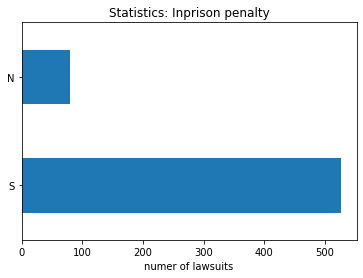

In [ ]:
data_src['Reclusao'].value_counts().plot.barh()
plt.title('Statistics: Inprison penalty')
plt.xlabel('numer of lawsuits')
plt.show()

In [ ]:
data_src['Reclusao'].value_counts()

S    526
N     80
Name: Reclusao, dtype: int64

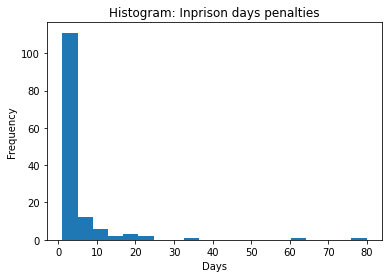

In [ ]:
data_src['ReclusaoDias'].value_counts().plot.hist(bins=20)
plt.title('Histogram: Inprison days penalties')
plt.xlabel('Days')
plt.show()

In [ ]:
data_src['ReclusaoDias'].value_counts()

0       80
720     64
1920    33
360     24
1080    21
        ..
2730     1
685      1
1710     1
2760     1
2598     1
Name: ReclusaoDias, Length: 139, dtype: int64

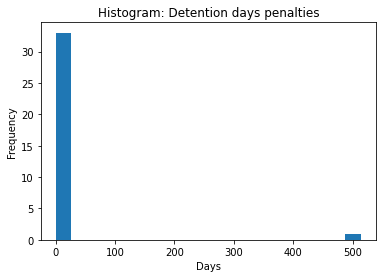

In [ ]:
data_src['DetencaoDias'].value_counts().plot.hist(bins=20)
plt.title('Histogram: Detention days penalties')
plt.xlabel('Days')
plt.show()

In [ ]:
data_src['DetencaoDias'].value_counts()

0       513
180      21
90       12
360       9
720       4
15        3
30        3
120       3
960       3
1560      3
540       2
270       2
240       2
210       2
60        2
390       2
1140      2
75        2
1440      1
480       1
10        1
40        1
45        1
1080      1
1500      1
100       1
123       1
140       1
600       1
900       1
300       1
325       1
420       1
150       1
Name: DetencaoDias, dtype: int64

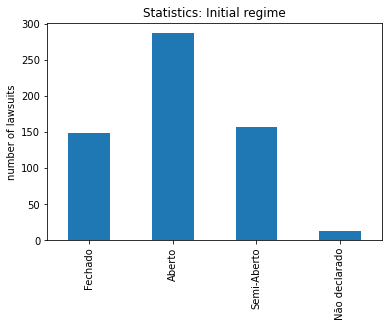

In [ ]:
data_src['RegimeInicial'].value_counts(sort=False).plot.bar()
plt.title('Statistics: Initial regime')
plt.ylabel('number of lawsuits')
plt.show()

In [ ]:
data_src['RegimeInicial'].value_counts()

Aberto           287
Semi-Aberto      157
Fechado          149
Não declarado     13
Name: RegimeInicial, dtype: int64

In [ ]:
# adjust for RegimeInicial not declared, low and not representative value replaced by open regime
data_src.replace({'RegimeInicial':{'Não declarado':'Aberto'}},inplace=True)

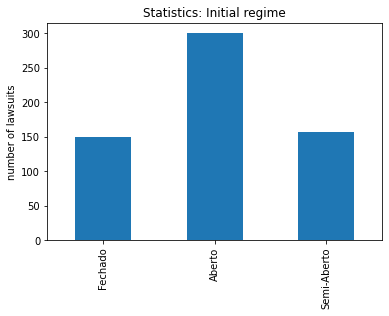

In [ ]:
data_src['RegimeInicial'].value_counts(sort=False).plot.bar()
plt.title('Statistics: Initial regime')
plt.ylabel('number of lawsuits')
plt.show()

In [ ]:
data_src['RegimeInicial'].value_counts()

Aberto         300
Semi-Aberto    157
Fechado        149
Name: RegimeInicial, dtype: int64

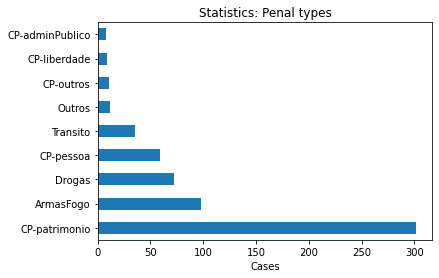

In [ ]:
data_src['TipoPenalGenerico'].value_counts().plot.barh()
plt.title('Statistics: Penal types')
plt.xlabel('Cases')
plt.show()

In [ ]:
data_src['TipoPenalGenerico'].value_counts()

CP-patrimonio      302
ArmasFogo           98
Drogas              72
CP-pessoa           59
Transito            35
Outros              12
CP-outros           11
CP-liberdade         9
CP-adminPublico      8
Name: TipoPenalGenerico, dtype: int64

In [ ]:
for col in data_src:
    print(col, ':', data_src[col].unique())

Ano : [2010 2011 2012 2013 2014 2015 2016 2019 2018 2008 2020 2017 2009 2007]
GeneroReu : ['M' 'F']
Reclusao : ['N' 'S']
ReclusaoDias : [   0  720  540  480  780 1440 1050 1260 1920 1800 3286  900 2340 1980
  450  840  990 2240 1560 2520 1080 3960 2700  360  420 2460  150 1710
 2400 3000 2160 1350 2970 2880  225  180 1520 3120  240 2040  120 1620
 4800 2592 2268 3840  570 2070 2640 2765 1530  630 2800 2706  746 3400
  960  880 1200  270  750 2560 1500 2100 1680 1890 1950 1575 1650 1625
 2730 2639 2682  300 1822 2430 5760 3920 1125 4680  600  810 2310 1120
 3528 3600 3060 1400 5204 9750 1792 1190  660  560 2025 1461 1138 4410
 5400 3986 2688  760  640  673 1930 6030 4320 7920 5040 2598 1170 3151
 1830  432 6143  685 4080   90 1380 6960 2300 5265 2280 1290 1280 1181
 6120 2550 1740  855 5940 1140  800 7560 1020 1728 3150 6480 2760]
Detencao : ['S' 'N']
DetencaoDias : [   0   90  120  325  300   60  240   30   75  720   15  360  100  180
  123  960  140  540 1560  150 1140  480 1500  270 

# closing data to p1


In [ ]:
data_src.to_pickle('alemPena-p1.pickle')